<a href="https://colab.research.google.com/github/TuGhoy/ubion/blob/main/20230103%20%EC%B0%A8%ED%98%84%EC%84%B1%EC%A1%B0%20%EC%8A%A4%ED%81%AC%EB%A6%BD%ED%8A%B8%20%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**김혜림 박채원 송부근 차현성**

# 데이터 예제 실습 1 : 박스플롯&이상치 값 출력, merge함수

In [2]:
# 구글 드라이브에서 'salary'데이터 가져오기
# pandas는 series(1차원), DataFrame(2차원), panel(3차원)을 사용
import pandas as pd
df_salary = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/salary.csv")
df_salary

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199220,13.8,1
...,...,...,...,...
204,930,1509.099976,9.0,4
205,525,1097.099976,15.5,4
206,658,4542.600098,12.1,4
207,555,2023.000000,13.7,4


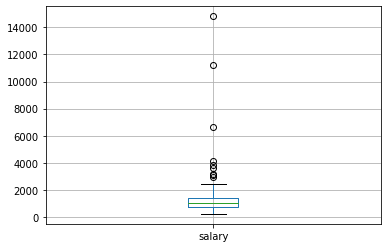

In [3]:
df_salary.boxplot(column="salary")

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c8ef6fa0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7ff2c89e7250>, <matplotlib.lines.Line2D object at 0x7ff2c89e75b0>], 'caps': [<matplotlib.lines.Line2D object at 0x7ff2c89e7910>, <matplotlib.lines.Line2D object at 0x7ff2c89e7c70>], 'boxes': [<matplotlib.lines.Line2D object at 0x7ff2c89d7eb0>], 'medians': [<matplotlib.lines.Line2D object at 0x7ff2c89e7fd0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7ff2c89f1310>], 'means': []})

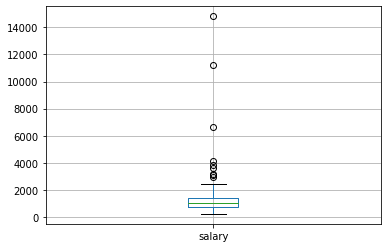

In [4]:
# 'salary'데이터 박스플롯으로 출력 : 이상값 및 결측값 관측 가능
df_salary.boxplot(column="salary" , return_type="both")

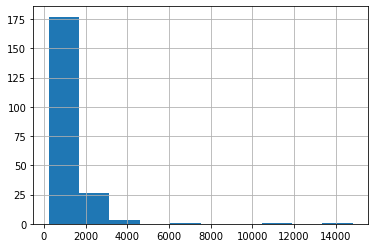

In [5]:
# 'salary'데이터 히스토그램으로 출력. 
# 출력된 결과에서 분포가 고르지 않고 몰려 있음. 분석이 어려움.
df_salary["salary"].hist()

In [6]:
# 박스플롯 값 출력 (이상치 제거된)
#quantile 0.25 1분위 / 0.5 2분위 / 0.75 3분위
q1 = df_salary["salary"].quantile(q=0.25)
q3 = df_salary["salary"].quantile(q=0.75)
IQR = q3-q1
IQR

671.0

In [7]:
# IQR의 1.5까지 이상치가 아님
# 제 3분위(75% 상위값) & 제 1사분위 (25% 하위값)을 data_IQR에 입력
data_IQR = df_salary [(df_salary["salary"] < q3 + IQR * 1.5) & (df_salary["salary"] > q1 - IQR * 1.5)]
data_IQR


,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199220,13.8,1
...,...,...,...,...
204,930,1509.099976,9.0,4
205,525,1097.099976,15.5,4
206,658,4542.600098,12.1,4
207,555,2023.000000,13.7,4


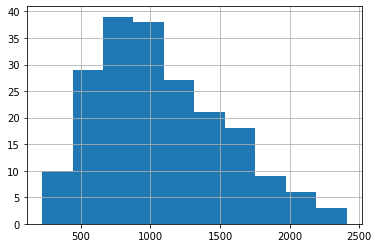

In [8]:
data_IQR["salary"].hist()

In [9]:
# 이상치 값 출력
data_outlier = df_salary [(df_salary["salary"] > q3 + IQR * 1.5)] 
data_outlier

,salary,sales,roe,industry
25,2983,57662.000000,19.000000,1
27,3844,20604.000000,12.100000,1
86,4143,2678.399902,14.400000,2
107,6640,8946.000000,10.200000,2
124,3142,10236.299800,35.700001,3
160,3068,3825.600098,21.500000,3
163,11233,6047.899902,22.900000,3
165,3646,3921.500000,7.800000,3
173,14822,2159.199951,19.400000,3


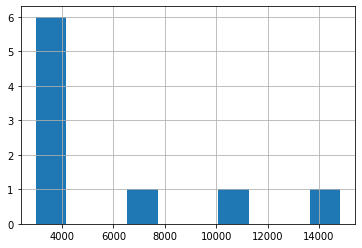

In [10]:
data_outlier["salary"].hist()

In [11]:
# encoding : 보통  cp949 아니면 utf-8로 사용. 일종의 해석 방식.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping다시.csv" , encoding = "cp949")
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [12]:
# describe 정보 요약
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [13]:
# 열만 출력
# 총 매출액(종속변수)에 대한 영향 파악 위함
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [14]:
# 500기준으로 나눠보기
under_500 = df[df["고객ID"]<=500]
upper_500 = df[df["고객ID"]>500]

print(under_500)
print(upper_500)

     고객ID  이탈여부     총매출액  구매금액대  방문빈도  1회 평균매출액  할인권 사용 횟수  총 할인 금액  고객등급  \
0       1     1  4963160      1    22    225598          1     5445     1   
1       2     1  2271520      0    38     59777         22   350995     1   
2       3     1  2484250      0     2   1242125          6   186045     1   
3       4     1  2778850      0     9    308761          1     5195     2   
4       5     1  4437610      1    10    443761          9   246350     2   
..    ...   ...      ...    ...   ...       ...        ...      ...   ...   
495   496     0  3738330      0    13    287564          5   132345     2   
496   497     0  1981390      0    14    141528         22   350550     1   
497   498     0  7583360      2    32    236980         12   303250     2   
498   499     0  4381950      1    19    230629         17   365145     2   
499   500     0  9875170      2    42    235123          8   260450     2   

     구매유형  ...  구매카테고리수  거주지역  성별  고객 나이대  거래기간  할인민감여부  Recency  Frequency

In [15]:
upper_500.head() #500보다 높은 값만 출력. 상위 5개 값 출력.

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
500,501,0,5746950,1,51,112685,20,368100,2,1,...,8,4,1,4,4134,0,7,5,6,80.058824
501,502,0,2603520,0,19,137027,26,365150,1,4,...,3,4,1,4,4135,0,4,1,2,216.631579
502,503,0,2815940,0,12,234662,20,347600,1,1,...,3,4,0,3,4136,0,4,1,2,343.666667
503,504,0,10838570,2,33,328442,9,246795,2,4,...,5,5,0,4,2569,1,1,3,4,76.848485
504,505,0,2227170,0,20,111359,29,374995,1,2,...,3,5,1,5,3931,0,4,2,2,195.550000


In [16]:
under_500.head() #500보다 작은 값을 출력. 상위 5개 값 출력.

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000


In [17]:
# join 문자 열 합침
# under500과 upper500 append 덧붙임
df_join = under_500.append(upper_500)
print(df_join)

     고객ID  이탈여부      총매출액  구매금액대  방문빈도  1회 평균매출액  할인권 사용 횟수  총 할인 금액  고객등급  \
0       1     1   4963160      1    22    225598          1     5445     1   
1       2     1   2271520      0    38     59777         22   350995     1   
2       3     1   2484250      0     2   1242125          6   186045     1   
3       4     1   2778850      0     9    308761          1     5195     2   
4       5     1   4437610      1    10    443761          9   246350     2   
..    ...   ...       ...    ...   ...       ...        ...      ...   ...   
995   996     0  12731560      2    35    363759          3    44445     2   
996   997     0   3419010      0     6    569835          6   186545     1   
997   998     0   4612100      1    13    354777          8   260700     2   
998   999     0   5165360      1    28    184477         20   347700     1   
999  1000     0   4323050      1    16    270191         19   367045     2   

     구매유형  ...  구매카테고리수  거주지역  성별  고객 나이대  거래기간  할인민감여부  Recenc

In [18]:
df_join.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [19]:
# [[]]두번묶기. 바깥쪽 괄호[]는 인덱스, 안쪽 괄호[]는 리스트
y = df_join[[ "고객ID" , "총매출액"]]

In [20]:
x = df_join[["고객ID" , "방문빈도" , "고객등급", "구매유형" , "거주지역"]]

In [21]:
y

,고객ID,총매출액
0,1,4963160
1,2,2271520
2,3,2484250
3,4,2778850
4,5,4437610
...,...,...
995,996,12731560
996,997,3419010
997,998,4612100
998,999,5165360


In [22]:
x

,고객ID,방문빈도,고객등급,구매유형,거주지역
0,1,22,1,3,6
1,2,38,1,1,4
2,3,2,1,2,6
3,4,9,2,4,5
4,5,10,2,4,6
...,...,...,...,...,...
995,996,35,2,3,6
996,997,6,1,2,6
997,998,13,2,1,4
998,999,28,1,3,5


In [23]:
# 데이터를 DataFrame에 넣어서 엑셀(표)로 만듬.
y = pd.DataFrame(y)
x = pd.DataFrame(x)

In [24]:
y

,고객ID,총매출액
0,1,4963160
1,2,2271520
2,3,2484250
3,4,2778850
4,5,4437610
...,...,...
995,996,12731560
996,997,3419010
997,998,4612100
998,999,5165360


In [25]:
x

,고객ID,방문빈도,고객등급,구매유형,거주지역
0,1,22,1,3,6
1,2,38,1,1,4
2,3,2,1,2,6
3,4,9,2,4,5
4,5,10,2,4,6
...,...,...,...,...,...
995,996,35,2,3,6
996,997,6,1,2,6
997,998,13,2,1,4
998,999,28,1,3,5


In [74]:
# merge : 공통된 값이 있어야 key를 불러와 데이터 프레임 합칠 수 있음.
xy_merge = y.merge(x)
xy_merge

MergeError: ignored

In [27]:
# sudo라는 명령어를 통해서 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (18.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [28]:
import matplotlib.pyplot as plt

plt.rc('font' , family='NanumBarunGothic')


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_

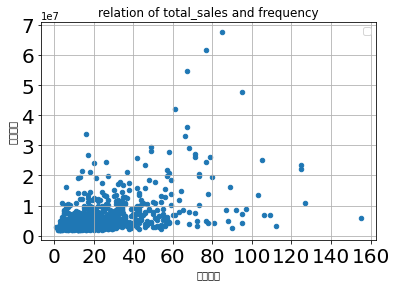

In [29]:
%matplotlib inline # 도표나 그림 같은 결과물 출력
xy_merge.plot.scatter(x = "방문빈도" , y = "총매출액" , title = "relation of total_sales and frequency")

plt.legend() #범례
plt.grid() #격자배경
plt.xticks(fontsize = 20)
plt.yticks(fontsize=20)
plt.show() #선택 요소 나타나게함

#데이터 예제 실습 2 : groupby 함수, 왜도&첨도


In [30]:
# 구글 드라이브에서 'Ashopping'데이터 가져오기
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping다시.csv" , encoding = "cp949" )
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [31]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [32]:
# groupby : 집단으로 이루어진 것을 그룹으로 나눌 수 있음
print(df.groupby("성별").mean()) #평균

          고객ID      이탈여부          총매출액     구매금액대       방문빈도       1회 평균매출액  \
성별                                                                           
0   517.180025  0.268804  5.781799e+06  0.704069  23.112207  344725.376079   
1   428.925926  0.433862  6.185048e+06  0.682540  22.047619  383757.052910   

    할인권 사용 횟수        총 할인 금액      고객등급      구매유형   클레임접수여부   구매카테고리수  \
성별                                                                     
0   16.046856  294429.001233  1.558570  2.637485  0.358816  5.200986   
1   15.941799  283543.650794  1.492063  2.735450  0.312169  5.285714   

        거주지역    고객 나이대         거래기간    할인민감여부   Recency  Frequency  Monetary  \
성별                                                                             
0   5.161529  3.921085  3520.073983  0.418002  4.906289   2.278668  4.141800   
1   5.084656  4.148148  3392.121693  0.322751  5.005291   2.333333  4.074074   

       평균 구매주기  
성별              
0   262.104400  
1   287.376485  


In [33]:
print(df.groupby("성별").var()) #분산

            고객ID      이탈여부          총매출액     구매금액대        방문빈도      1회 평균매출액  \
성별                                                                             
0   82541.937921  0.196791  2.874438e+13  0.620959  348.378752  9.824220e+10   
1   81278.845548  0.246932  5.556999e+13  0.568896  433.003040  9.428816e+10   

    할인권 사용 횟수       총 할인 금액      고객등급      구매유형   클레임접수여부   구매카테고리수      거주지역  \
성별                                                                              
0   68.582987  1.216729e+10  0.246874  1.085704  0.230351  4.876839  1.399802   
1   74.225318  1.406279e+10  0.251266  1.131769  0.215862  5.268997  1.226838   

      고객 나이대          거래기간    할인민감여부   Recency  Frequency  Monetary  \
성별                                                                    
0   1.176481  9.056816e+05  0.243577  3.006022   2.682742  2.432954   
1   1.073680  1.042798e+06  0.219746  3.207419   3.255319  2.451931   

         평균 구매주기  
성별                
0   65957.588656  
1   58336.30

In [34]:
print(df.groupby("성별").std()) #표준편차

          고객ID      이탈여부          총매출액     구매금액대       방문빈도       1회 평균매출액  \
성별                                                                           
0   287.301128  0.443611  5.361378e+06  0.788009  18.664907  313436.120237   
1   285.094450  0.496923  7.454528e+06  0.754252  20.808725  307063.772432   

    할인권 사용 횟수        총 할인 금액      고객등급      구매유형   클레임접수여부   구매카테고리수  \
성별                                                                     
0    8.281485  110305.453399  0.496864  1.041971  0.479949  2.208357   
1    8.615412  118586.636918  0.501265  1.063846  0.464609  2.295430   

        거주지역    고객 나이대         거래기간    할인민감여부   Recency  Frequency  Monetary  \
성별                                                                             
0   1.183132  1.084657   951.673064  0.493535  1.733788   1.637908  1.559793   
1   1.107627  1.036185  1021.174835  0.468770  1.790927   1.804250  1.565864   

       평균 구매주기  
성별              
0   256.822095  
1   241.529105  


In [35]:
print(df.총매출액.skew()) #왜도(치우침 정도)

4.649270270840756


In [36]:
print(df.총매출액.kurt()) #첨도(뾰족함 정도)

32.586256242003


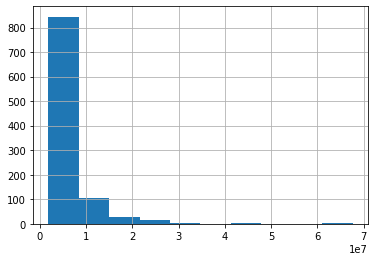

In [37]:
# 히스토그램 그리기1
df.총매출액.hist()

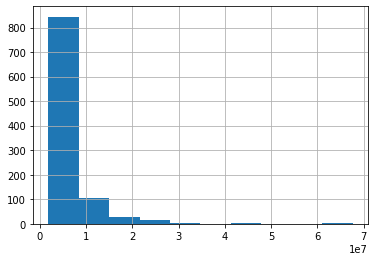

In [38]:
# 히스토그램 그리기2
df["총매출액"].hist()

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2b934dbb0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7ff2b92fb520>, <matplotlib.lines.Line2D object at 0x7ff2b92fb880>], 'caps': [<matplotlib.lines.Line2D object at 0x7ff2b92fbbe0>, <matplotlib.lines.Line2D object at 0x7ff2b92fbf40>], 'boxes': [<matplotlib.lines.Line2D object at 0x7ff2b92fb1c0>], 'medians': [<matplotlib.lines.Line2D object at 0x7ff2b93032e0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7ff2b93035e0>], 'means': []})

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_te

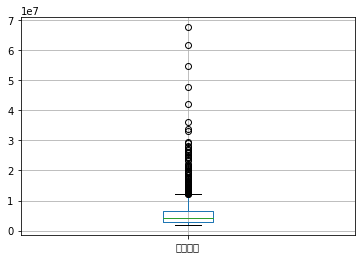

In [82]:
pd.DataFrame(df["총매출액"]).boxplot(column = "총매출액", return_type = "both")

#데이터 파일 예제 실습 3 : scale, minmax 함수

In [40]:
# 구글 드라이브에서 'Ashopping2'데이터 가져오기
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping2.csv" , encoding = "cp949")
df2

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [41]:
#sklearn : 단위에 관한 것들을 없애주고 정교화시켜주는 패키징. 
#MinMaxScaler (정규화) :  원데이터 분포를 유지하면서 정규화 하는 방법 , 모든 값이 0과 1사이에 존재하기 때문에 항상 값이 양수
#Standard Scaler (표준화) : 평균0, 분산 1을 갖도록 스케일 조정, 모든 값이 -1과 1사이에 존재
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

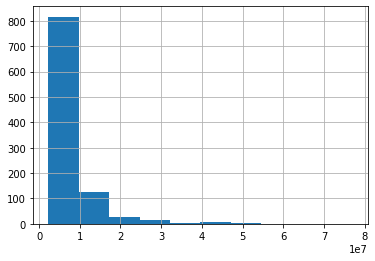

In [42]:
# scale을 쓰는 이유 : 분포가 고르지 않아 해석이 어려움
df2.총_매출액.hist()

In [43]:
df2.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [44]:
# scale 적용 : 고루 분포하게 만듬
# preprocessing.scale 적용 : 범위 안에서 최소, 최댓값 설정
df2["총_매출액_scale"] = preprocessing.scale(df2["총_매출액"])

In [45]:
df2["총_매출액_scale"].describe()

count    1.000000e+03
mean     4.440892e-17
std      1.000500e+00
min     -6.889126e-01
25%     -5.407834e-01
50%     -3.380653e-01
75%      1.194335e-01
max      1.005364e+01
Name: 총_매출액_scale, dtype: float64

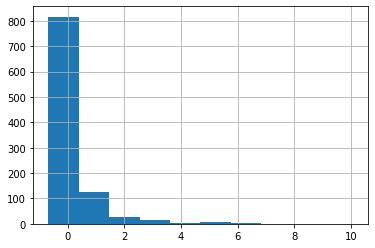

In [83]:
df2["총_매출액_scale"].hist()

In [46]:
#총_매출액에 scale이 적용된 것을 알 수 있음
df2.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale'],
      dtype='object')

In [47]:
#MinMaxScaler 적용 : 0과 1 사이의 값으로 분포 나타냄
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df2)
df_minmax
df_minmax = pd.DataFrame(df_minmax)
df2["총_매출액_minmax"] = df_minmax[2]

In [84]:
df2["총_매출액_minmax"]

0     0.023
1     0.012
2     0.005
3     0.049
4     0.153
       ... 
995   0.038
996   0.108
997   0.006
998   0.120
999   0.012
Name: 총_매출액_minmax, Length: 1000, dtype: float64

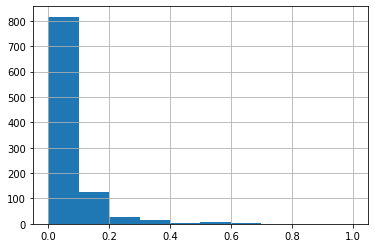

In [85]:
df2["총_매출액_minmax"].hist()

In [89]:
# StandardScaler 적용 : -1과 1 사이의 값으로 분포 나타냄
scaler = StandardScaler()
df_standard = scaler.fit_transform(df2)
df_standard
df_standard = pd.DataFrame(df_standard)
df2["총_매출액_standard"] = df_standard[2]

In [90]:
df_standard

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-1.730,-0.268,-0.440,-0.451,-0.354,-1.802,-2.565,-0.602,0.918,-0.921,...,0.242,0.381,0.668,0.577,0.413,0.581,0.644,-0.440,-0.440,-0.440
1,-1.727,3.732,-0.560,-0.592,-0.394,0.716,0.524,1.661,0.918,-0.921,...,0.242,0.381,-0.415,-2.446,0.413,0.581,0.644,-0.560,-0.560,-0.560
2,-1.723,-0.268,-0.630,-0.404,-0.729,-1.203,-0.950,-0.602,0.918,1.086,...,0.242,0.381,1.752,1.585,0.413,0.581,2.003,-0.630,-0.630,-0.630
3,-1.720,-0.268,-0.161,-0.451,0.140,-1.802,-2.567,-0.602,0.918,1.086,...,0.242,0.381,0.668,0.577,0.413,-0.699,0.644,-0.161,-0.161,-0.161
4,-1.716,-0.268,0.959,2.181,-0.559,-0.843,-0.411,-0.602,-1.106,-0.921,...,0.242,-0.889,-0.415,0.577,0.413,-0.699,0.644,0.959,0.959,0.959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.716,-0.268,-0.278,-0.875,1.405,-1.563,-2.216,-0.602,-0.094,1.086,...,0.242,1.651,0.668,0.577,0.413,0.581,0.644,-0.278,-0.278,-0.278
996,1.720,-0.268,0.466,1.053,-0.463,-1.203,-0.946,-0.602,-1.106,-0.921,...,-1.034,0.381,-0.415,1.585,0.413,0.581,0.644,0.466,0.466,0.466
997,1.723,-0.268,-0.621,-0.781,-0.187,-0.963,-0.283,1.661,0.918,-0.921,...,0.242,-0.889,0.668,-1.438,-0.846,0.581,-0.715,-0.621,-0.621,-0.621
998,1.727,-0.268,0.603,-0.545,1.879,0.477,0.495,-0.602,-0.094,-0.921,...,-2.310,-2.159,-1.498,-0.430,-0.846,-1.980,-2.074,0.603,0.603,0.603


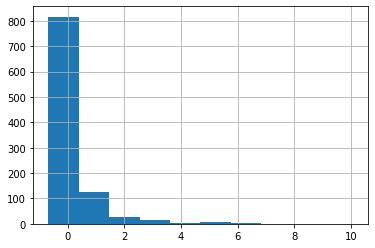

In [88]:
df2["총_매출액_standard"].hist()

In [91]:
#총_매출액에 minmax, standard가 적용된 것을 알 수 있음
df2.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale', '총_매출액_minmax', '총_매출액_standard'],
      dtype='object')

In [50]:
# minmax 적용 예시
x = df2[["이탈여부" , "방문빈도" , "할인권_사용 횟수"]]
scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x)

In [51]:
x_minmax = pd.DataFrame(x_minmax)

In [52]:
x_minmax

,0,1,2
0,0.0,0.074627,0.000000
1,1.0,0.059701,0.724138
2,0.0,0.079602,0.172414
3,0.0,0.074627,0.000000
4,0.0,0.353234,0.275862
...,...,...,...
995,0.0,0.029851,0.068966
996,0.0,0.233831,0.172414
997,0.0,0.039801,0.241379
998,0.0,0.064677,0.655172


#데이터 파일 예제 실습 4 : t-test

In [53]:
df2

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,총_매출액_scale,총_매출액_minmax
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,6,-0.439705,0.023198
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,6,5,3,6,6,6,-0.560155,0.011986
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,7,7,6,6,7,-0.630187,0.005467
3,4,0,5946600,17,349800,1,5195,1,4,1,...,5,6,6,6,6,6,5,6,-0.161153,0.049128
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,6,5,5,6,6,5,6,0.958981,0.153399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,7,6,7,6,6,6,6,6,-0.277702,0.038279
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,5,6,5,7,6,6,6,0.466331,0.107539
997,998,0,2741290,10,274129,8,260700,2,4,0,...,6,6,5,6,4,5,6,5,-0.621496,0.006276
998,999,0,11268990,15,751266,20,347700,1,3,0,...,4,4,4,4,5,5,4,4,0.603243,0.120284


In [54]:
from scipy import stats

In [55]:
# 일표본 t-test. 표본 하나로 평균 추정
print(df2.총_매출액.mean())

7068689.76


In [76]:
# 예측값과 실제평균값 비교 결과 : p-value < 0.05 , 대립가설 채택 귀무가설 기각
print(stats.ttest_1samp(df2["총_매출액"], 7700000))

7068689.76
Ttest_1sampResult(statistic=-2.8657430145836007, pvalue=0.00424758614832654)


In [57]:
# 독립표본 t-test / 표본 두가지 구분 : no_claim / claim

no_claim = df2[df2["클레임접수여부"]==0]
no_claim

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,총_매출액_scale,총_매출액_minmax
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,6,-0.439705,0.023198
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,6,5,3,6,6,6,-0.560155,0.011986
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,6,5,5,6,6,5,6,0.958981,0.153399
5,6,0,3323610,26,127831,20,348145,1,4,0,...,6,6,5,5,5,6,6,5,-0.537864,0.014061
6,7,0,2369340,6,394890,30,380945,1,1,0,...,6,4,6,5,4,5,5,4,-0.674916,0.001303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,0,12390390,20,619520,23,380395,1,3,0,...,6,5,6,7,6,6,6,6,0.764297,0.135276
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,5,6,5,7,6,6,6,0.466331,0.107539
997,998,0,2741290,10,274129,8,260700,2,4,0,...,6,6,5,6,4,5,6,5,-0.621496,0.006276
998,999,0,11268990,15,751266,20,347700,1,3,0,...,4,4,4,4,5,5,4,4,0.603243,0.120284


In [58]:
claim = df2[df2["클레임접수여부"]==1]
claim

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,총_매출액_scale,총_매출액_minmax
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,7,7,6,6,7,-0.630187,0.005467
3,4,0,5946600,17,349800,1,5195,1,4,1,...,5,6,6,6,6,6,5,6,-0.161153,0.049128
7,8,0,12717240,109,116672,4,354735,1,2,1,...,5,7,6,6,5,6,6,6,0.811239,0.139646
13,14,0,4098600,15,273240,14,334100,2,4,1,...,6,6,6,4,5,7,6,6,-0.426561,0.024422
14,15,0,3754700,21,178795,23,380200,2,4,1,...,6,6,7,4,5,5,5,5,-0.475952,0.019824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,986,0,5358350,16,334897,26,364650,1,4,1,...,5,6,5,5,6,6,6,6,-0.245637,0.041264
986,987,0,7879000,35,225114,14,333850,1,2,1,...,7,6,6,4,5,6,6,6,0.116376,0.074963
989,990,0,2540870,15,169391,23,379950,2,4,1,...,5,6,5,6,6,5,5,5,-0.650281,0.003596
991,992,0,9302490,40,232562,10,304450,1,2,1,...,6,6,6,6,6,6,6,6,0.320816,0.093993


In [59]:
no_claim.방문빈도.mean()

28.184842883548985

In [60]:
claim.방문빈도.mean()

24.736383442265794

In [61]:
# 두 표본의 평균값 비교.
# equal_var= False는 등분산 검증 안 했기 때문 (분산이 같은지 모름)
# statistic 2.59...로 차이 ㅇ / p-value < 0.05 , 대립가설 채택
print(stats.ttest_ind(no_claim["방문빈도"] , claim["방문빈도"] , equal_var=False))

Ttest_indResult(statistic=2.595726838875684, pvalue=0.009577734932789503)


#ANOVA 테스트 : 세 집단 이상 비교 (등분산)

In [62]:
# 코랩에 pingouin과 scikit_posthocs를 설치
!pip install pingouin 
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 KB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.3-py3-none-any.whl size=198588 sha256=2ccf916e8bf5afdeae069564476cf3a8d586b3c391b8fa61271e16662eb8d2af
  Stored in directory: /root/.cache/pip/wheels/60/1e/21/710be95d0c93ea9ac3c0e6bacd8cce492ad5dd26bf3aedc4bf
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=064bbf4367b44fbbfa264bf9b524fb60768f491bd097ae74d682473a44b0a90d
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleuti

In [63]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats. anova import anova_lm

In [65]:
df2["구매유형"].describe()

count    1000.000000
mean        3.093000
std         0.988599
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: 구매유형, dtype: float64

In [67]:
# 등분산 분석 
# pvalue > 0.05 등분산이다(귀무), pvalue < 0.05 등분산 아니다(대립)

df1 = df2[["구매유형", "총_매출액"]]
pd.options.display.float_format = '{:.3f}'.format  #소수점 4자리에서 반올림하여 소수점 3자리까지 출력력

type1 = [ ]
for i in range(1,5,1):
    type1.append(df1[df1.구매유형==i].총_매출액)
sp.stats.levene(type1[0], type1[1], type1[2], type1[3]) 


LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

In [68]:
# 등분산 아니다 -> welch 적용
# 대립가설 : 각 구매유형 별로 총매출액 평균이 다르다
# pvalue, f값, ddof1(자유도) 확인인
pg.welch_anova(dv = "총_매출액" , between = "구매유형" , data = df2)

,Source,ddof1,ddof2,F,p-unc,np2
0,구매유형,3,230.936,88.238,0.000,0.193


In [ ]:
# 등분산이다 -> ols 적용
# 귀무가설 : 각 구매유형 별로 총매출액 평균이 같다

#model = ols("총_매출액 - 구매유형" , data = df1).fit()
#annova_lm(model)

In [71]:
# 각 구매유형 별로 총매출액 평균이 다른 것을 확인
print(type1[0].mean())
print(type1[1].mean())
print(type1[2].mean())
print(type1[3].mean())

3403682.3255813955
9612645.078864353
11779839.652777778
4392794.395161291


In [72]:
df1

,구매유형,총_매출액
0,4,4007080
1,4,3168400
2,4,2680780
3,4,5946600
4,2,13745950
...,...,...
995,3,5135090
996,2,10315690
997,4,2741290
998,3,11268990


In [73]:
df2.groupby("구매유형").mean()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,클레임접수여부,구매_카테고리_수,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,총_매출액_scale,총_매출액_minmax
구매유형,,,,,,,,,,,,,,,,,,,,,
1,523.186,0.047,3403682.326,10.023,350206.419,22.419,368907.674,1.419,0.442,4.581,...,5.721,5.651,5.744,5.279,5.512,5.512,5.581,5.558,-0.526,0.015
2,476.407,0.041,9612645.079,46.997,204790.259,16.344,300001.577,1.123,0.379,5.675,...,5.700,5.836,5.722,5.341,5.416,5.688,5.609,5.565,0.365,0.098
3,514.868,0.132,11779839.653,17.375,736705.521,16.319,292041.042,1.382,0.604,4.812,...,5.771,5.778,5.674,5.354,5.486,5.688,5.535,5.556,0.677,0.127
4,509.760,0.067,4392794.395,17.683,264714.028,15.185,280956.109,1.310,0.470,4.956,...,5.692,5.817,5.690,5.427,5.409,5.671,5.506,5.490,-0.384,0.028
